In [1]:
%run code/helper_functions.ipynb

In [2]:
df = pd.read_csv("./datasets/train.csv")
df.set_index('Id', inplace = True)

Let's generate correlation heatmaps for area related columns.

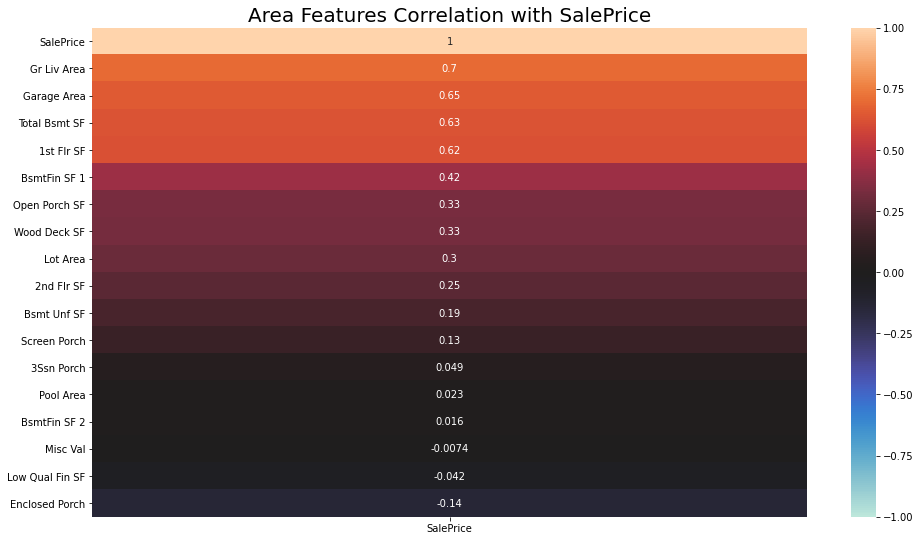

In [3]:
area_cols = ['Lot Area', 'BsmtFin SF 1',
                   'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                   '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
                   'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
                   'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

zoning = 'MS Zoning'

target = 'SalePrice'

df_area = df[area_cols]
display_corr_heatmap(df_area,target,title_prefix='Area ',save=True)

Let's compile all features with SalePrice correlation 0.1 or above.

In [4]:
corr = df_area.corr()
strong_corrs = corr[corr['SalePrice']>=0.1]#['SalePrice']
strong_corrs = strong_corrs.drop('SalePrice')
features = list(strong_corrs.index)
features

['Lot Area',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Screen Porch']

If we want to use these features in linear regression model, we need to makes sure that they have normal distributions. Let's plot histograms for these variables

<Figure size 1152x648 with 0 Axes>

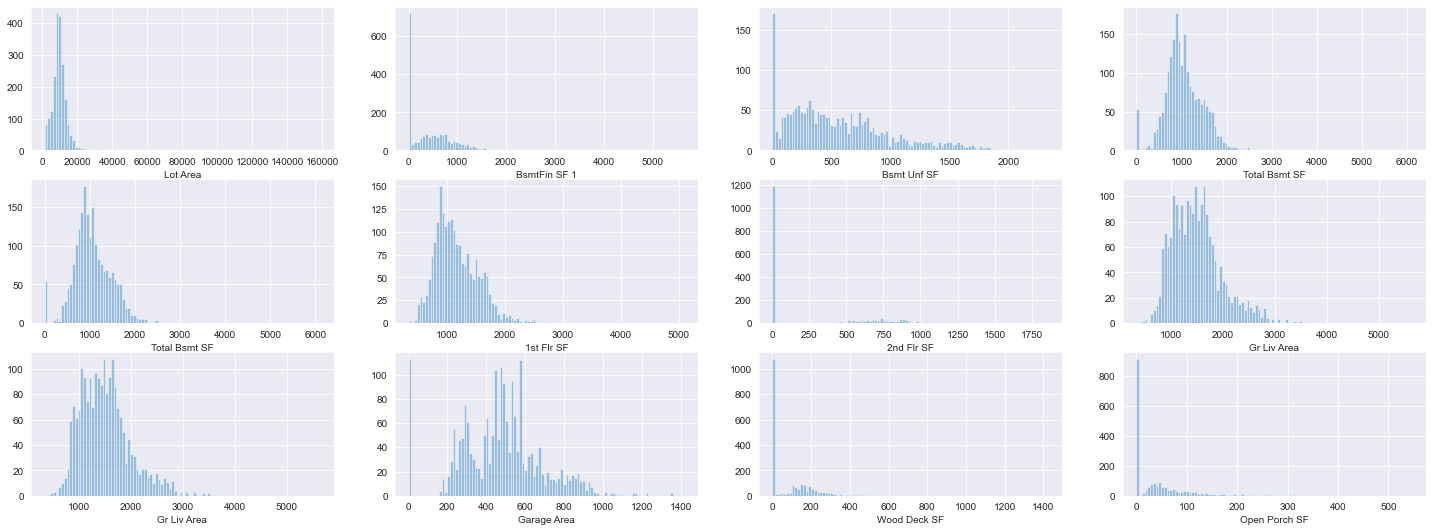

In [5]:
generate_histograms(df[features],3,4,save=True,fname="area_histograms")

Of these variables 'Lot Area', '1st Flr SF', 'Garage Area', 'Total Bsmt SF', and 'Gr Liv Area' are normally distributed. The rest do not display normal distribution and should not be considered for our Multiple Linear Regression.

In [6]:
area_feats=['Lot Area','1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Area']

Next, we will turn to property zoning.  Zoning is a generalizable property characteristic that can encapsulate many price forming characteristics.  We will view Sale Prices organized into box-plots to understand to relationship between zone and price.

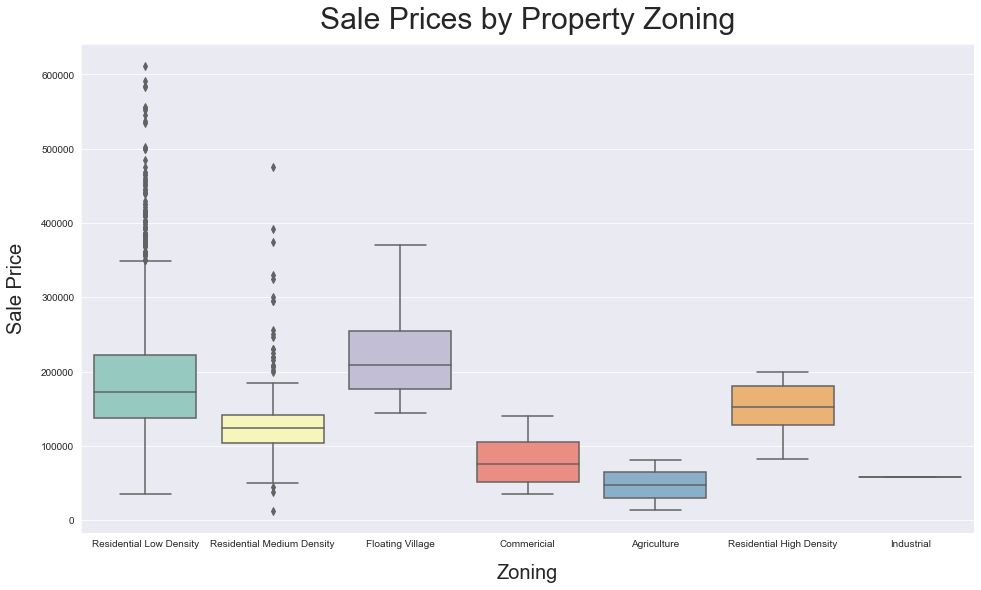

In [7]:
zones = ['Residential Low Density','Residential Medium Density','Floating Village',
         'Commericial','Agriculture','Residential High Density','Industrial']

plt.figure(figsize = (16,9))
box = sns.boxplot(x=zoning, y=target,
                 data=df, palette="Set3");
box.set_ylabel('Sale Price',size=20,labelpad=15)
box.set_xlabel('Zoning',size=20,labelpad=15)
box.set_xticklabels(zones)
box.set_title("Sale Prices by Property Zoning",size=30,pad=15);
plt.savefig("SalePricesByZoning.png")

It appears that non-residential property sales (commercial, agriculture, industrial) have lower median values than residential ones.  Residential Low Density and Residential Medium Density homes are the most represented in the data set and have a high range in values.

Let's look at a several more scatter plot so we can begin to understand the relationships between price, zoning, and area.

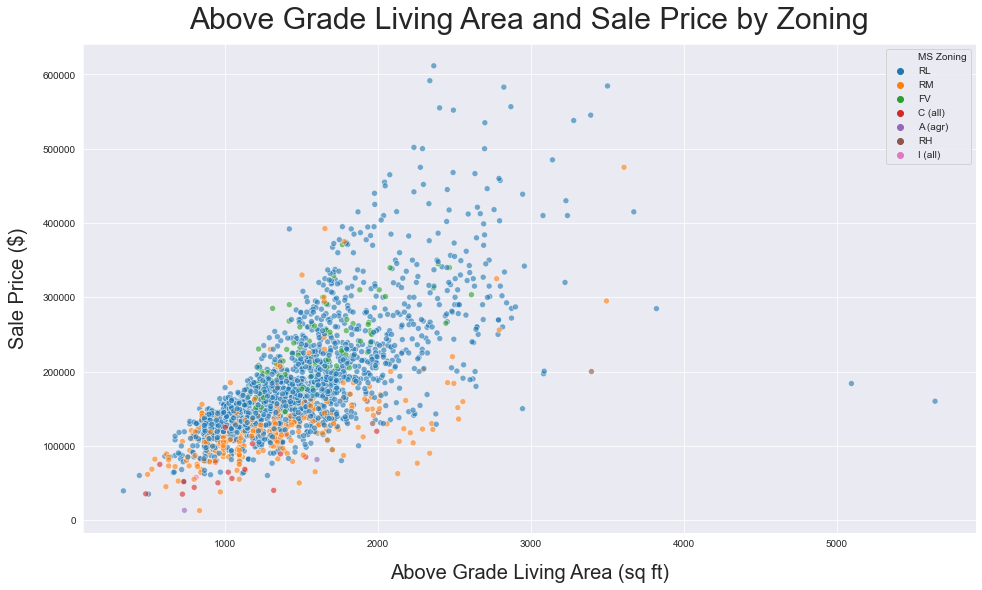

In [8]:
plt.figure(figsize=(16,9))

sns.set_style('darkgrid')

scat = sns.scatterplot(x='Gr Liv Area',y='SalePrice',hue=zoning, data=df,alpha=0.6)
scat.set_ylabel('Sale Price ($)',size=20,labelpad=15)
scat.set_xlabel('Above Grade Living Area (sq ft)',size=20,labelpad=15)
scat.set_title("Above Grade Living Area and Sale Price by Zoning",size=30,pad=15);

plt.savefig("AboveGradeLivingAreaAndSalePriceByZoning.png")

The plot above is "Above Grade Living Area Sq Feet" versus "Sale  Price" with Zones indicated by hue.  We can see linear relationships between independent and dependent variables and we can generally see that "Resl identical Middle" and "Residential Low" (the two most common zones) have slighlty different sloped linear relationships to price, indicating that combining these variables will be helpful in our model.

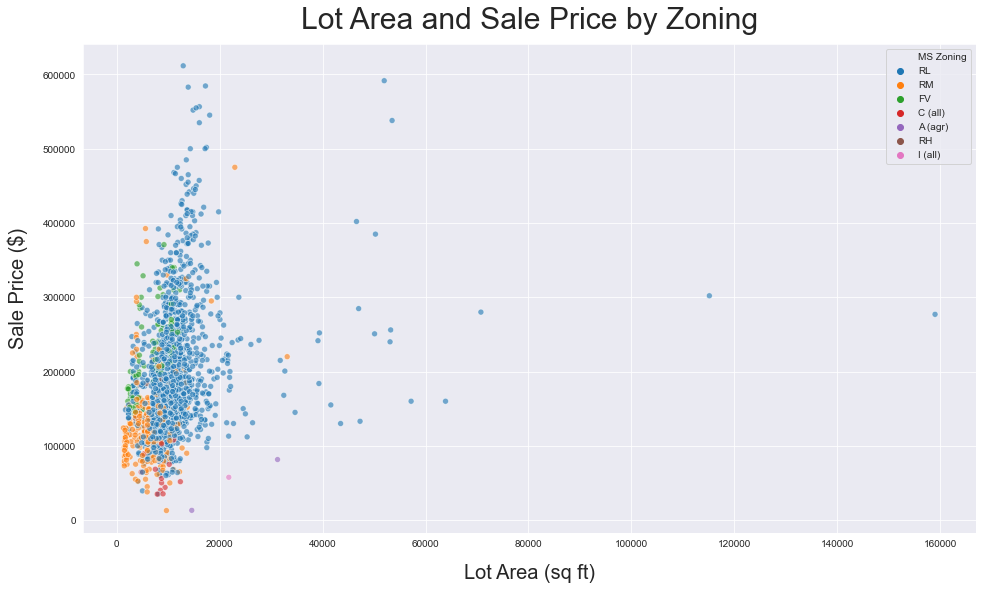

In [9]:
plt.figure(figsize=(16,9))

sns.set_style('darkgrid')

scat = sns.scatterplot(x='Lot Area',y='SalePrice',hue=zoning, data=df,alpha=0.6);
scat.set_ylabel('Sale Price ($)',size=20,labelpad=15)
scat.set_xlabel('Lot Area (sq ft)',size=20,labelpad=15)
scat.set_title("Lot Area and Sale Price by Zoning",size=30,pad=15);

plt.savefig("LotAreaAndSalePriceByZoning.png")

Lot Area and Sale Price have steep linear relationships. It doesn not appear that the slopes vary between zones, but that is ok it will still be helpful in our model.

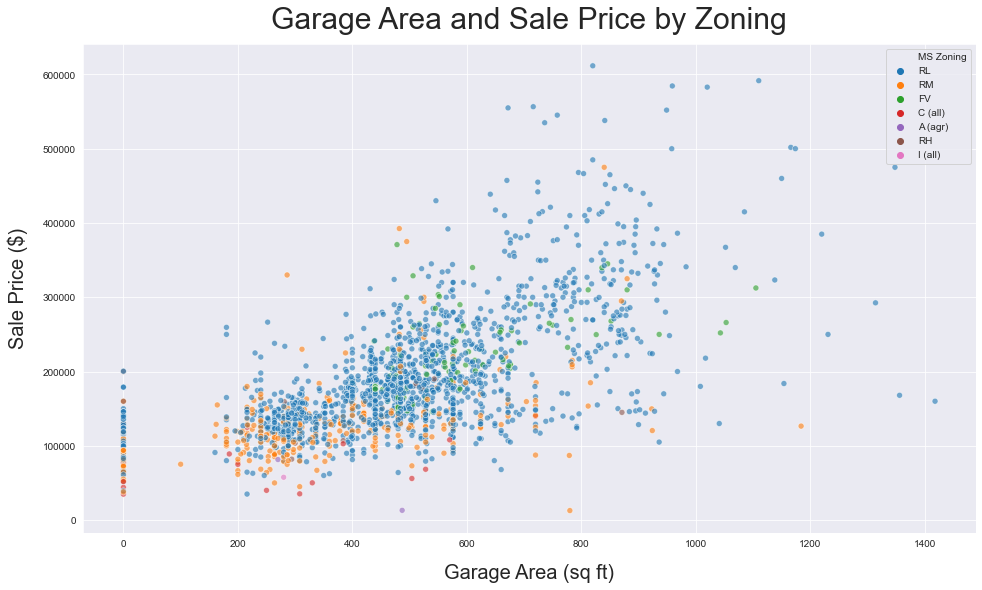

In [10]:
plt.figure(figsize=(16,9))

sns.set_style('darkgrid')

scat = sns.scatterplot(x='Garage Area',y='SalePrice',hue=zoning, data=df,alpha=0.6);
scat.set_ylabel('Sale Price ($)',size=20,labelpad=15)
scat.set_xlabel('Garage Area (sq ft)',size=20,labelpad=15)
scat.set_title("Garage Area and Sale Price by Zoning",size=30,pad=15);

plt.savefig("GarageAreaAndSalePriceByZoning.png")

Garage Area will be useful in our model because it appears that that are slightly different sloped linear relationship between it and price for Res Low and Res Medium.

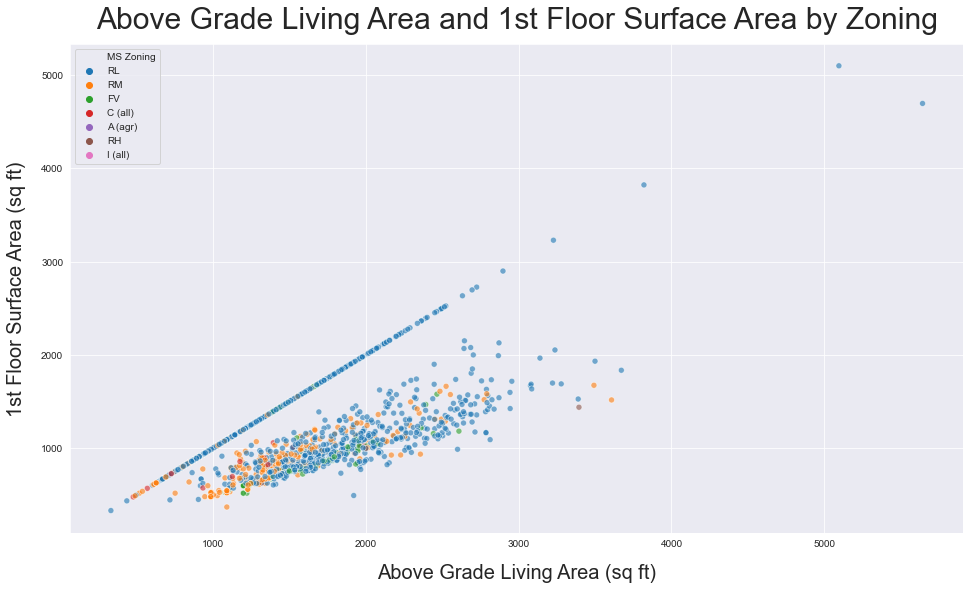

In [11]:
plt.figure(figsize=(16,9))

sns.set_style('darkgrid')

scat = sns.scatterplot(x='Gr Liv Area',y='1st Flr SF',hue=zoning, data=df,alpha=0.6)

scat.set_ylabel('1st Floor Surface Area (sq ft)',size=20,labelpad=15)
scat.set_xlabel('Above Grade Living Area (sq ft)',size=20,labelpad=15)
scat.set_title("Above Grade Living Area and 1st Floor Surface Area by Zoning",size=30,pad=15);

plt.savefig("AboveGradeLivingAreaAnd1stFlrSFByZoning.png")

### A Note on Multicolinearity ###
There is heavy risk of multicolinearity if we combine the wrong area metrics.  For example, "1st Flr SF" is part of "Gr Liv Area", so they two are incredible closely correlated.  Including both in our model will create multicollinearity which confuses their coefficients and makes it hard to evaluate respective impact.

Total Basement SF is also included in Gr Liv Area and so will cause multicollinearity.

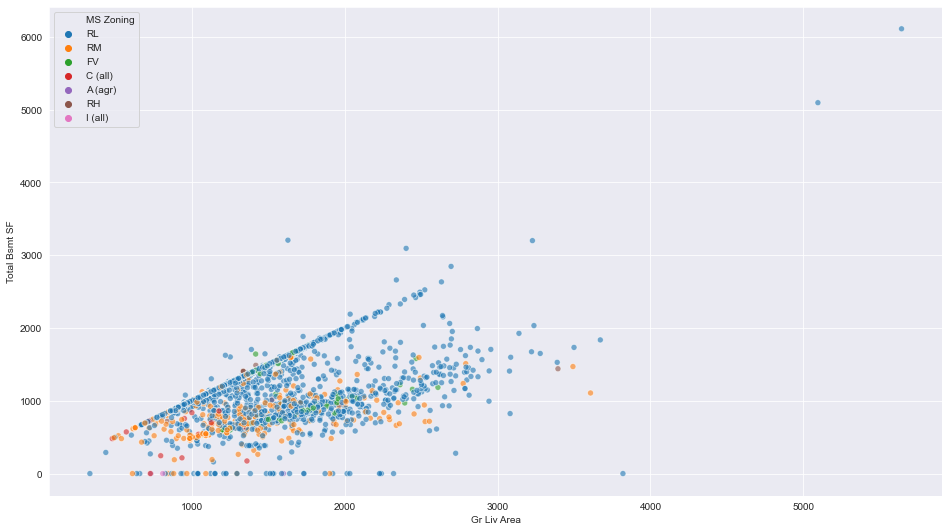

In [12]:
plt.figure(figsize=(16,9))

sns.set_style('darkgrid')

scat = sns.scatterplot(x='Gr Liv Area',y='Total Bsmt SF',hue=zoning, data=df,alpha=0.6);